# Importando pacotes

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lendo Arquivo

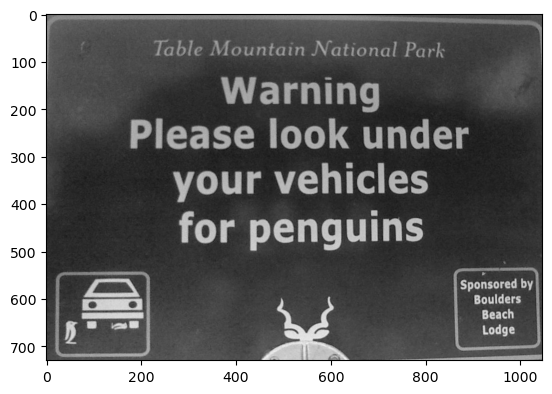

In [2]:
arquivo = 'penguins.png'
peng = cv2.imread(arquivo)
plt.imshow(peng, cmap='gray')
plt.show()

# Obtendo os kernels Kv e Ku, aplicando os na imagem com blur para ter Iv e Iu

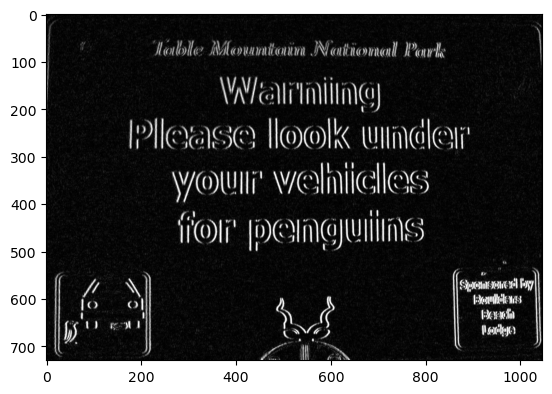

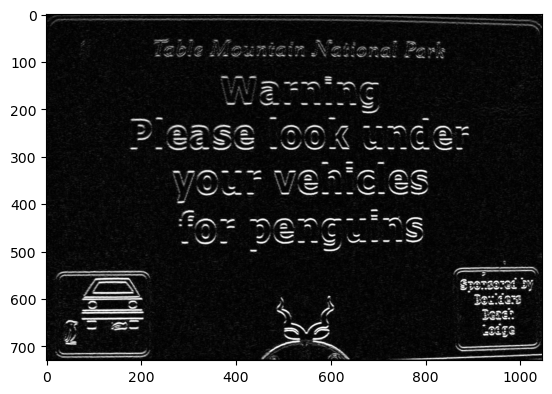

In [7]:
blurp = cv2.GaussianBlur(peng,(3,3),0)

Kv = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]], dtype=np.float64)
Ku = cv2.transpose(Kv)

Iv = cv2.filter2D(blurp, cv2.CV_64F, Kv)
Iu = cv2.filter2D(blurp, cv2.CV_64F, Ku)

Iv = cv2.convertScaleAbs(Iv)
Iu = cv2.convertScaleAbs(Iu)

plt.imshow(Iv, cmap='gray')
plt.show()
plt.imshow(Iu, cmap='gray')
plt.show()

# Aplicando a fórmula e plotando a imagem final das bordas

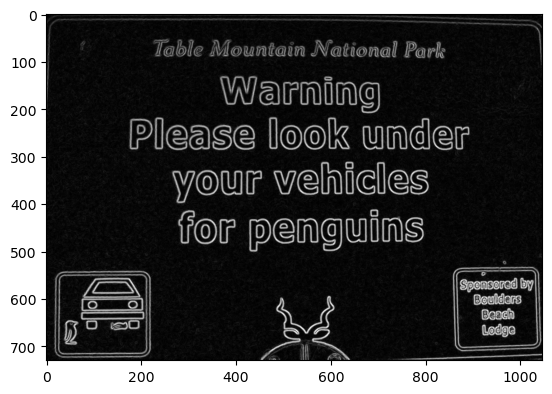

In [23]:
soma = np.square(Iu.astype(np.float32)) + np.square(Iv.astype(np.float32))
I = np.sqrt(soma)
If = cv2.normalize(I, None, 0, 255, cv2.NORM_MINMAX)
If = np.uint8(If)

plt.imshow(If, cmap='gray')
plt.show()